In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, random, ipywidgets, utils

# Analysis

The project aim is to create a Machine Learning model capable of detecting the dates when a crop field has been manured, using satellite data. <br>
Before even starting considering models, it is useful to perform exploratory analysis on the previously extracted features.

Preliminary data analysis and data analysis in general are crucial in EO (Earth Observation) because they enable us to extract valuable information from vast amounts of data collected by remote sensing instruments. Here are some of the key reasons why data analysis is helpful in EO:
* **Identify patterns and trends:** it can allow us to identify patterns and trends in EO data that might not be immediately visible. By analyzing different types of data, we can identify correlations, trends, and other patterns that can provide insight into the underlying processes that are affecting the Earth's surface.
* **Quality control:** it is crucial for quality control of EO data. By examining data for outliers, errors, and anomalies, we can ensure that the data is accurate and reliable. This is important for maintaining the integrity of long-term datasets and for ensuring that the data can be used for scientific research.
* **Visualization:** it allows us to visualize EO data in various ways, including maps, charts, and graphs. This helps us to understand the data better and to communicate our findings more effectively to policymakers, stakeholders, and the public.

## Load the already generated features-extracted datasets

In [2]:
# Sentinel 2
s2_df = pd.read_csv('../../Datasets/main/main-fields-s2-features-extracted.gz', compression='gzip')
s2_df

,crop_field_name,s2_acquisition_date,B1,B2,B3,B4,B5,B6,B7,B8,...,CARI1,CARI2,MCARI,MCARI1,MCARI2,BSI,GLI,ALTERATION,SDI,manure_dates
0,P-BLD,2022-01-06,2.260204,119.981293,550.044218,234.045918,1055.875850,3447.054422,3945.947279,4264.421769,...,5303.671221,258.251928,3251.205159,6296.698571,0.922907,6282.955014,0.513069,2.131255,3484.508503,['2022-05-26']
1,P-BLD,2022-01-16,13.785714,111.540816,528.481293,224.115646,1062.081633,3571.093537,4166.239796,4458.365646,...,5524.406415,243.430799,3465.366528,6572.130408,0.921371,6545.200602,0.517949,2.127614,3636.382653,['2022-05-26']
2,P-BLD,2022-01-26,1092.221088,1174.479592,1585.828231,1284.115646,2188.639456,4718.545918,5334.006803,5582.107143,...,5638.426548,3807.506599,1336.179664,6659.779388,0.745694,10711.826348,0.126648,1.498058,3800.190476,['2022-05-26']
3,P-BLD,2022-01-31,3576.698980,3435.090136,3346.115646,3145.602041,3469.377551,4235.498299,4499.940476,4695.761905,...,7248.838290,6024.411146,329.911749,2545.031429,0.338758,14647.077956,0.008404,1.220073,1934.144558,['2022-05-26']
4,P-BLD,2022-02-05,1271.739796,1333.068027,1797.221088,1433.763605,2455.855442,5567.085034,6378.239796,6670.309524,...,6344.601486,4516.258365,1525.082405,8107.619796,0.759702,12721.888953,0.130101,1.549347,4551.319728,['2022-05-26']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,P-VNS,2022-10-08,6795.376682,6678.621525,6363.823318,6065.527354,6370.362332,6417.423318,6472.839462,6501.944395,...,13057.608911,8135.206560,318.781529,1093.782242,0.105144,24887.306273,-0.000648,1.071527,1238.345291,['2022-04-23']
851,P-VNS,2022-10-23,4059.667265,4026.379372,3709.677130,3366.669058,3713.954260,4235.782063,4364.606278,4536.184753,...,7809.331674,4330.322514,382.165375,2219.195193,0.305779,15406.636074,0.001776,1.091108,1350.292377,['2022-04-23']
852,P-VNS,2022-11-12,1443.568610,1602.507623,1970.007175,1972.767713,2587.695964,3854.926457,4186.630493,4406.135426,...,5741.673956,7573.688309,644.561034,3499.743067,0.496458,11958.219068,0.048533,1.385334,1536.214350,['2022-04-23']
853,P-VNS,2022-11-17,1133.057399,1364.994619,1726.755157,1631.587444,2309.713004,3881.580269,4315.133632,4503.217040,...,5345.539942,5596.065474,794.920534,4283.608251,0.594553,11195.020251,0.070841,1.441033,1939.695067,['2022-04-23']


In [3]:
# Sentinel 1
s1_df = pd.read_csv('../../Datasets/main/main-fields-s1-features-extracted.gz', compression='gzip')
s1_df

,crop_field_name,s1_acquisition_date,VV,VH,AVE,DIF,RAT1,RAT2,NDI,RVI,manure_dates
0,P-BLD,2022-01-08,-13.310323,-20.305863,-16.808093,6.995540,0.655492,1.525573,-0.208100,2.416201,['2022-05-26']
1,P-BLD,2022-01-20,-14.468510,-19.414386,-16.941448,4.945876,0.745247,1.341837,-0.145970,2.291939,['2022-05-26']
2,P-BLD,2022-02-01,-13.837687,-20.370130,-17.103909,6.532442,0.679313,1.472076,-0.190963,2.381927,['2022-05-26']
3,P-BLD,2022-02-13,-14.072960,-20.416036,-17.244498,6.343076,0.689309,1.450728,-0.183916,2.367832,['2022-05-26']
4,P-BLD,2022-02-25,-14.952295,-20.977422,-17.964858,6.025127,0.712780,1.402957,-0.167692,2.335384,['2022-05-26']
...,...,...,...,...,...,...,...,...,...,...,...
958,P-VNS,2022-11-04,-10.377194,-16.707189,-13.542191,6.329995,0.621121,1.609991,-0.233714,2.467428,['2022-04-23']
959,P-VNS,2022-11-16,-10.902844,-17.969719,-14.436282,7.066875,0.606734,1.648168,-0.244761,2.489522,['2022-04-23']
960,P-VNS,2022-11-28,-9.501097,-16.193383,-12.847240,6.692286,0.586727,1.704370,-0.260456,2.520912,['2022-04-23']
961,P-VNS,2022-12-10,-10.948047,-18.870771,-14.909409,7.922724,0.580159,1.723666,-0.265695,2.531391,['2022-04-23']


## Number of acquisitions per crop-field details

Via the following lines of code, we want to understand and see whether the number of acquisitions of each crop field is almost equally distributed. This because we don't want that our analysis (and also our final results) is more biased on few fields.

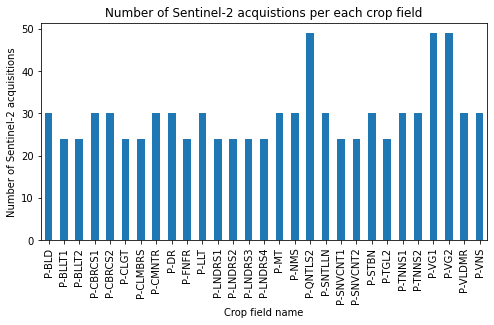

In [4]:
s2_df['crop_field_name'].value_counts().sort_index().plot(title = 'Number of Sentinel-2 acquistions per each crop field',
                                                                       xlabel = 'Crop field name', 
                                                                       ylabel = 'Number of Sentinel-2 acquisitions',
                                                                       kind = 'bar',
                                                                       figsize=(8,4));

In [5]:
print('Mean acquisitions per field, with Sentinel-2: ' + str(int(np.mean(s2_df['crop_field_name'].value_counts()))))
print('Standard deviation acquisitions per field, with Sentinel-2: ' + str(int(np.std(s2_df['crop_field_name'].value_counts()))))

Mean acquisitions per field, with Sentinel-2: 29
Standard deviation acquisitions per field, with Sentinel-2: 7


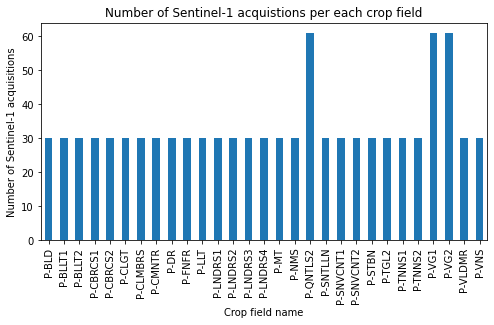

In [6]:
s1_df['crop_field_name'].value_counts().sort_index().plot(title = 'Number of Sentinel-1 acquistions per each crop field',
                                                                       xlabel = 'Crop field name', 
                                                                       ylabel = 'Number of Sentinel-1 acquisitions',
                                                                       kind = 'bar',
                                                                       figsize=(8,4));

In [7]:
print('Mean acquisitions per field, with Sentinel-1: ' + str(int(np.mean(s1_df['crop_field_name'].value_counts()))))
print('Standard deviation acquisitions per field, with Sentinel-1: ' + str(int(np.std(s1_df['crop_field_name'].value_counts()))))

Mean acquisitions per field, with Sentinel-1: 33
Standard deviation acquisitions per field, with Sentinel-1: 9


## Simple statistics

The `describe()` method is a built-in function in Pandas library that is used to generate a summary of the statistical measures of the numeric columns in a Pandas DataFrame. It provides useful insights into the central tendency, dispersion, and shape of the distribution of the data.

There are several reasons why calling the `describe()` method on a DataFrame can be useful:
* **Data Exploration:** it provides a quick and easy way to get a summary of the key statistical measures of the data, including the count, mean, standard deviation, minimum, and maximum values, as well as the quartiles. This can be useful in exploring the data and gaining an initial understanding of the data distribution.
* **Data Cleaning:** it can help identify outliers or anomalies in the data. For example, if the minimum or maximum values are significantly different from the rest of the data, it could indicate a data entry error or other issues that need to be addressed.
* **Data Preparation:** it can help in deciding how to preprocess the data. For example, if the mean and median are significantly different, it may indicate that the data is skewed and needs to be transformed before using certain algorithms.
* **Data Visualization:** it can help identify the range of values in the data, which can be useful in deciding how to plot the data for visualization purposes.

Overall, calling the `describe()` method on a DataFrame is a simple and effective way to gain insights into the data and identify potential issues that need to be addressed before further analysis.

In [8]:
s2_df.describe()

,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,...,NDRE3,CARI1,CARI2,MCARI,MCARI1,MCARI2,BSI,GLI,ALTERATION,SDI
count,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,...,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000
mean,1924.838836,1996.741265,2224.480087,2095.938399,2679.500401,4127.633661,4597.933667,4789.831777,4833.486697,5229.934052,...,0.020928,6072.594023,5934.847961,769.594631,4079.731496,0.539579,12331.173716,0.074633,1.402651,2231.508762
std,1856.056151,1766.042044,1578.126343,1550.354986,1480.932618,1220.105821,1206.962651,1231.044805,1159.366066,2122.529772,...,0.013517,2811.438294,3885.174385,505.904020,1834.693132,0.201432,5130.943051,0.089638,0.200431,1111.983769
min,1.000000,58.993399,390.964286,164.101124,836.369431,1215.704655,1274.939005,1323.598716,1331.067416,1226.997944,...,-0.052057,2192.107914,65.669343,61.515446,480.258684,0.043632,4205.589304,-0.024066,1.032149,-485.737624
25%,1177.904873,1272.875815,1611.668275,1406.404634,2073.532091,3453.983890,3872.010225,4076.420013,4169.336411,4208.883107,...,0.012676,4882.980117,3920.607536,433.311795,2540.568689,0.410182,10491.074942,0.020697,1.284791,1338.397079
50%,1347.679918,1440.140056,1750.151815,1638.717391,2297.733333,3935.755319,4490.086154,4688.881967,4767.608907,4851.235294,...,0.019713,5338.005549,5018.210762,654.230646,4091.901333,0.579311,11214.255259,0.057092,1.407635,2229.089788
75%,1650.093282,1731.331129,2025.320446,2067.725067,2610.632645,4562.595331,5213.471253,5435.910844,5453.592322,5578.573943,...,0.026900,5858.535273,7391.152309,983.946493,5459.768873,0.689144,12213.720624,0.094988,1.477296,3048.330594
max,12623.757377,11368.170492,11054.878689,10858.318033,11407.481967,11356.859016,11190.203279,11311.449180,11025.740984,17282.098361,...,0.107605,23137.224866,35775.813011,3465.366528,8341.091446,0.926115,40643.715045,0.589919,2.187539,5964.488525


In [9]:
s1_df.describe()

,VV,VH,AVE,DIF,RAT1,RAT2,NDI,RVI
count,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000
mean,-11.889475,-18.380088,-15.134782,6.490614,0.645762,1.574652,-0.217650,2.435301
std,1.836231,1.766494,1.673093,1.336983,0.070994,0.288573,0.056287,0.112574
min,-17.346230,-25.646705,-20.549187,2.559193,0.125948,1.171192,-0.776280,2.157694
25%,-13.131024,-19.491665,-16.187117,5.627025,0.606702,1.442690,-0.244786,2.362461
50%,-11.850810,-18.248480,-15.046198,6.323760,0.651233,1.535548,-0.211216,2.422432
75%,-10.801329,-17.228617,-14.083503,7.162902,0.693150,1.648256,-0.181231,2.489572
max,-1.798186,-12.983307,-8.037676,12.478981,0.853831,7.939763,-0.078847,3.552561


## Correlations
Correlations are important because they help us understand the relationship between two variables. In statistics, a correlation is a measure of how strongly two variables are related to each other. Correlations can be positive, indicating that as one variable increases, the other also increases, or negative, indicating that as one variable increases, the other decreases.

Before considering correlations, since value ranges for the different features are belonging into different value ranges is important to apply a normalization technique (a well known one is the Min-Max scaling, but also others can be considered).

### Min-Max scaling

Min-max scaling is a normalization technique that is often used in data preprocessing to scale numerical data in a way that all features have the same range of values. This is particularly useful when dealing with features that have different units or scales, as it helps to put them on a common scale and avoid biases in the analysis.

When analyzing correlations between variables, it is important to ensure that the variables are on the same scale. If the variables are not on the same scale, the correlation coefficient may not accurately reflect the true relationship between the variables. For example, if one variable has a much larger range of values than another variable, it may appear to have a stronger correlation with other variables, simply because of the larger range of values.

By performing min-max scaling, we can ensure that all features have the same range of values, and thus, the correlation coefficient can more accurately reflect the true relationship between the variables. This is particularly important when using techniques such as principal component analysis (PCA), where the variables are transformed into a new set of variables that are linearly uncorrelated. If the variables are not on the same scale, the resulting transformed variables may be biased towards features with larger ranges of values.

In [10]:
# Apply Min-Max scaling on Sentinel 2 dataset (for columns already not ranging between -1 and 1)
s2_df_norm = utils.get_MinMaxScaled_df(s2_df, feature_range=(-1, 1))
s2_df_norm

,crop_field_name,s2_acquisition_date,B1,B2,B3,B4,B5,B6,B7,B8,...,CARI1,CARI2,MCARI,MCARI1,MCARI2,BSI,GLI,ALTERATION,SDI,manure_dates
0,P-BLD,2022-01-06,-0.999800,-0.989214,-0.970165,-0.986919,-0.958471,-0.559942,-0.461233,-0.411120,...,-0.702884,-0.989214,0.874165,0.479853,0.922907,-0.885978,0.513069,0.902571,0.231041,['2022-05-26']
1,P-BLD,2022-01-16,-0.997974,-0.990707,-0.974209,-0.988776,-0.957296,-0.535479,-0.416798,-0.372284,...,-0.681807,-0.990044,1.000000,0.549930,0.921371,-0.871584,0.517949,0.896269,0.278132,['2022-05-26']
2,P-BLD,2022-01-26,-0.827103,-0.802729,-0.775905,-0.790538,-0.744157,-0.309183,-0.181249,-0.147262,...,-0.670919,-0.790433,-0.251046,0.572231,0.745694,-0.642888,0.126648,-0.193503,0.328923,['2022-05-26']
3,P-BLD,2022-01-31,-0.433452,-0.402946,-0.445766,-0.442409,-0.501848,-0.404448,-0.349488,-0.324747,...,-0.517145,-0.666272,-0.842298,-0.474668,0.338758,-0.426892,0.008404,-0.674700,-0.249675,['2022-05-26']
4,P-BLD,2022-02-05,-0.798659,-0.774683,-0.736259,-0.762552,-0.693602,-0.141837,0.029383,0.070643,...,-0.603488,-0.750738,-0.140052,0.940599,0.759702,-0.532561,0.130101,-0.104721,0.561823,['2022-05-26']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,P-VNS,2022-10-08,0.076528,0.170665,0.120200,0.103667,0.047003,0.025863,0.048464,0.036929,...,0.037521,-0.548054,-0.848838,-0.843904,0.105144,0.135169,-0.000648,-0.931837,-0.465419,['2022-04-23']
851,P-VNS,2022-10-23,-0.356929,-0.298378,-0.377581,-0.401065,-0.455576,-0.404392,-0.376786,-0.356701,...,-0.463625,-0.761152,-0.811596,-0.557569,0.305779,-0.385202,0.001776,-0.897942,-0.430708,['2022-04-23']
852,P-VNS,2022-11-12,-0.771434,-0.727033,-0.703853,-0.661749,-0.668658,-0.479503,-0.412685,-0.382743,...,-0.661060,-0.579502,-0.657420,-0.231765,0.496458,-0.574477,0.048533,-0.388631,-0.373060,['2022-04-23']
853,P-VNS,2022-11-17,-0.820632,-0.769037,-0.749475,-0.725555,-0.721251,-0.474246,-0.386765,-0.363303,...,-0.698886,-0.690262,-0.569073,-0.032329,0.594553,-0.616367,0.070841,-0.292215,-0.247954,['2022-04-23']


In [11]:
# Apply Min-Max scaling on Sentinel 1 dataset (for columns already not ranging between -1 and 1)
s1_df_norm = utils.get_MinMaxScaled_df(s1_df, feature_range=(-1, 1))
s1_df_norm

,crop_field_name,s1_acquisition_date,VV,VH,AVE,DIF,RAT1,RAT2,NDI,RVI,manure_dates
0,P-BLD,2022-01-08,-0.480847,-0.156492,-0.401976,-0.105556,0.655492,-0.895287,-0.208100,-0.629346,['2022-05-26']
1,P-BLD,2022-01-20,-0.629829,-0.015696,-0.423293,-0.518804,0.745247,-0.949577,-0.145970,-0.807515,['2022-05-26']
2,P-BLD,2022-02-01,-0.548684,-0.166642,-0.449263,-0.198925,0.679313,-0.911094,-0.190963,-0.678489,['2022-05-26']
3,P-BLD,2022-02-13,-0.578948,-0.173892,-0.471736,-0.237104,0.689309,-0.917402,-0.183916,-0.698699,['2022-05-26']
4,P-BLD,2022-02-25,-0.692060,-0.262554,-0.586888,-0.301208,0.712780,-0.931517,-0.167692,-0.745223,['2022-05-26']
...,...,...,...,...,...,...,...,...,...,...,...
958,P-VNS,2022-11-04,-0.103548,0.411867,0.120088,-0.239741,0.621121,-0.870342,-0.233714,-0.555895,['2022-04-23']
959,P-VNS,2022-11-16,-0.171165,0.212469,-0.022835,-0.091174,0.606734,-0.859062,-0.244761,-0.524216,['2022-04-23']
960,P-VNS,2022-11-28,0.009147,0.493015,0.231178,-0.166697,0.586727,-0.842455,-0.260456,-0.479207,['2022-04-23']
961,P-VNS,2022-12-10,-0.176979,0.070160,-0.098466,0.081380,0.580159,-0.836753,-0.265695,-0.464183,['2022-04-23']


### Standard correlations

[Kendall correlation, Spearman correlation, and Pearson correlation](https://datascience.stackexchange.com/questions/64260/pearson-vs-spearman-vs-kendall) are all measures of the association between two variables. However, they differ in the type of relationship they measure and the assumptions they make about the data.

1. **Pearson correlation:** It measures the linear relationship between two continuous variables. It assumes that the variables are normally distributed and have a linear relationship. It ranges from -1 to +1, where -1 indicates a perfect negative correlation, +1 indicates a perfect positive correlation, and 0 indicates no correlation.
1. **Spearman correlation:** It measures the rank correlation between two variables. It does not assume any specific distribution of the data and is suitable for non-parametric data. It ranges from -1 to +1, where -1 indicates a perfect negative correlation, +1 indicates a perfect positive correlation, and 0 indicates no correlation.
1. **Kendall correlation:** It is also a rank correlation measure that is used to assess the strength of the relationship between two variables. It is similar to Spearman correlation but it takes into account the number of concordant and discordant pairs of observations. It also ranges from -1 to +1, where -1 indicates a perfect negative correlation, +1 indicates a perfect positive correlation, and 0 indicates no correlation.

In summary, the choice of correlation measure depends on the type of data being analyzed and the nature of the relationship being studied. If the data is normally distributed and has a linear relationship, Pearson correlation is appropriate. However, if the data is non-parametric or has a non-linear relationship, Spearman or Kendall correlation may be more appropriate. Spearman correlation and Kendall correlation are also generally more robust to outliers compared to Pearson correlation. It's always important to consider the assumptions and limitations of each measure when interpreting the results.

In [12]:
# Select the method to use
corr_method_dropdown = ipywidgets.widgets.Dropdown(
    options=['Pearson', 'Spearman', 'Kendall'],
    value='Pearson',
    description='Method:',
    disabled=False,
)
corr_method_dropdown

Dropdown(description='Method:', options=('Pearson', 'Spearman', 'Kendall'), value='Pearson')

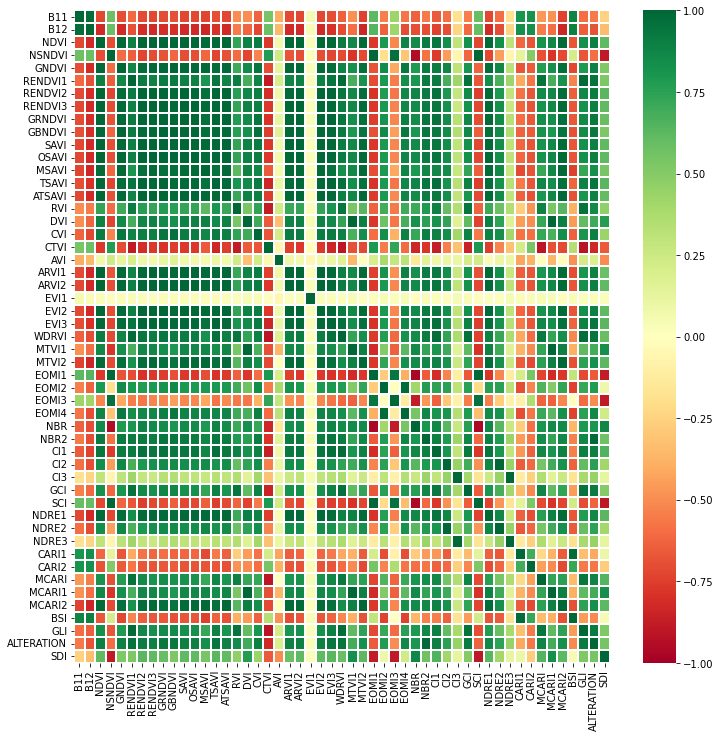

In [13]:
# Sentinel 2
plt.figure(figsize=(12, 12))
sns.heatmap(s2_df_norm.iloc[:, 12:].corr(method=corr_method_dropdown.value.lower()), cmap='RdYlGn', linewidths = 0.1, vmin=-1, vmax=1);

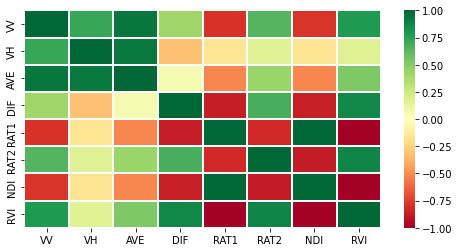

In [14]:
# Sentinel 1
plt.figure(figsize=(8, 4))
sns.heatmap(s1_df_norm.iloc[:, 2:].corr(method=corr_method_dropdown.value.lower()), cmap='RdYlGn', linewidths = 0.1, vmin=-1, vmax=1);

## Which are the features that are changing more significantly when the crop fields have been manured?
From the date of fertilization, let’s see what indexes change the most, that is to consider the trend of individual features throughout the whole year and then see if in the fertilization date that feature has changed significantly compared to the average (we want to understand what is the spectral response of the fertilization itself). 
We select only the features that possibly vary significantly from the average ONLY during the fertilization event. <br>
**Question:** does the variation of the considered feature occur significantly only in the fertilization date, or also in other situations (probably not)?

### Why feature selection on just a portion of the entire dataset?
Feature selection should be done on a portion of the entire dataset. This is because selecting features on the entire dataset can lead to overfitting, which occurs when the model becomes too complex and is fitted too closely to the training data, causing it to perform poorly on new, unseen data.

### Important formulae
For each crop field the relevant formulae are:
* **feat_imp = mean(abs((feat_scal_val[manured].mean() - feat_scal_val[~manured].mean()) / feat_scal_val[~manured].mean()))**
* **t_stat, p_val = scipy.stats.ttest_1samp(importance_df.groupby('feature').get_group(str(feature))['importance'], 0)**

Where `feat` is a shorter way to say feature, `imp` importance, `scal` scaled and `val` value.<br>
Whereas `importance_df` is a DataFrame containing for each crop field the features importance values.<br>

#### Few notes on above formulae
* `feat_imp` is the average of the absolute difference between the average value of a certain scaled feature when a field has been fertilized (over a limited time period, as an important [paper](https://www.mdpi.com/2072-4292/13/9/1616) have shown that the effect of fertilization on certain features - including EOMI indices, and possibly others - decreases over time) and the average value of the scaled feature when the field has not been fertilized, divided by the latter (for normalization). <br>
It is important to note that only some random fields were selected for this feature selection/reduction phase (otherwise, incorrect results may occur). Furthermore, features scaled values are the ones after `MinMaxScaling`, for a better analysis and comparison between features (especially the one ranging within different values).
* `t_stat` & `p_val` are two additional values obtained based on a **t-test**, that was conducted to determine how significant is the impact of fertilization on a single scaled feature (essentially, it was determined by how many times a significant change was observed across multiple fields - *null hypothesis* being the expected *group mean of 0* and the *alternative hypothesis* being that it is *greater than 0*).

In [15]:
# Fixing the seed for reproducibility
random.seed(23)
# Select a portion (only some crop fields) of the entire (scaled) Sentinel-2 DataFrame
s2_df_norm_subset = s2_df_norm[s2_df_norm['crop_field_name'].isin(random.sample(list(s2_df_norm['crop_field_name'].unique()), 20))]
# Assess Sentinel-2 features relevance
s2_features_importance_df = utils.get_features_importance(s2_df_norm_subset, sentinel=2)
s2_features_importance_df

,importance,t_statistic,p_value
feature,,,
DVI,15.043771,5.757542,1.507783e-05
MCARI1,3.451336,5.701203,1.702501e-05
MTVI1,3.451336,5.701203,1.702501e-05
EVI2,2.783092,5.347489,3.680291e-05
SAVI,2.782879,5.347415,3.680890e-05
...,...,...,...
NBR2,0.183923,6.433427,3.621455e-06
AVI,0.136090,4.692950,1.584229e-04
GCI,0.126255,6.552826,2.832166e-06


In [16]:
# Fixing the seed for reproducibility
random.seed(23)
# Select a portion (only some crop fields) of the entire (scaled) DataFrame
s1_df_norm_subset = s1_df_norm[s1_df_norm['crop_field_name'].isin(random.sample(list(s1_df_norm['crop_field_name'].unique()), 20))]
# Assess Sentinel-1 features relevance
s1_features_importance_df = utils.get_features_importance(s1_df_norm_subset, sentinel=1)
s1_features_importance_df

,importance,t_statistic,p_value
feature,,,
VH,2.140291,6.412680,0.000004
AVE,1.987904,6.759999,0.000002
DIF,1.659946,6.460854,0.000003
VV,0.699208,4.804582,0.000123
RVI,0.269500,3.461853,0.002612
NDI,0.255504,3.415191,0.002903
RAT1,0.109395,4.331136,0.000360
RAT2,0.100385,1.792672,0.088963


## Correlation between most relevant features (top list)

Showing the correlation between just the most relevant features (top list) can be beneficial for several reasons:
* **Reducing complexity:** When dealing with a large dataset, it can be challenging to identify which features are most relevant to the outcome being studied. By focusing on just the top few features, you can simplify the analysis and reduce the amount of noise in the data.
* **Better insights:** By focusing on the most relevant features, you can gain better insights into the underlying relationships between the features and the outcome variable. This can help you to identify the key drivers of the outcome and make more informed decisions.
* **Improved interpretability:** By focusing on a small set of relevant features, it can be easier to explain the results to others and make them more understandable. This is particularly important when communicating results to non-technical stakeholders or decision-makers.

The method used to test the correlation is the same one as selected above (`Kendall`, `Pearson`, or `Spearman`).

In [17]:
s2_number_features_widget = ipywidgets.widgets.IntSlider(value=30, min=1, max=len(s2_df_norm.columns) - 3, step=1, description='S2 #feats:')
display(s2_number_features_widget)

s1_number_features_widget = ipywidgets.widgets.IntSlider(value=5, min=1, max=len(s1_df_norm.columns) - 3, step=1, description='S1 #feats: ')
display(s1_number_features_widget)

IntSlider(value=30, description='S2 #feats:', max=61, min=1)

IntSlider(value=5, description='S1 #feats: ', max=8, min=1)

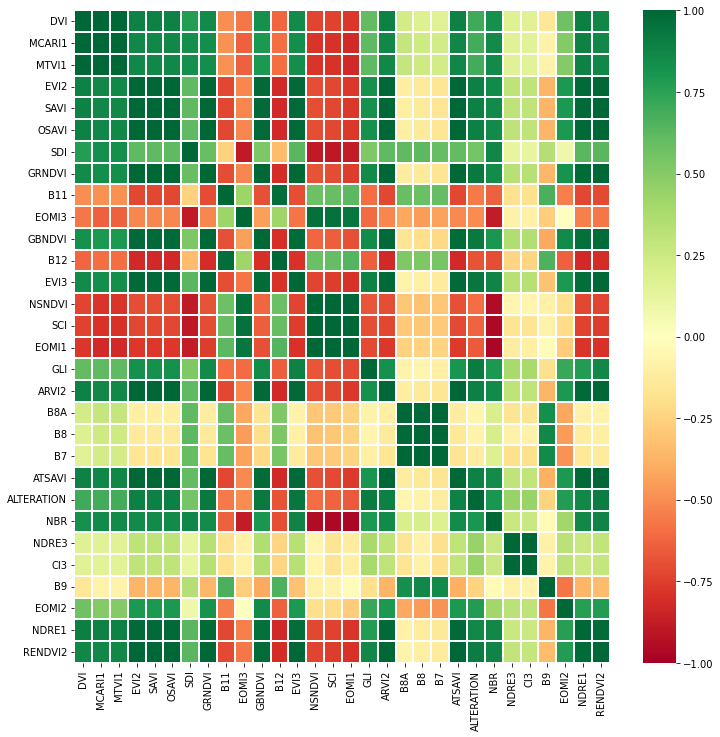

In [18]:
# Sentinel 2
plt.figure(figsize=(12, 12))
cols_to_select = s2_features_importance_df.iloc[:s2_number_features_widget.value].index
sns.heatmap(s2_df_norm[cols_to_select].corr(method=corr_method_dropdown.value.lower()), cmap='RdYlGn', linewidths = 0.1, vmin=-1, vmax=1);

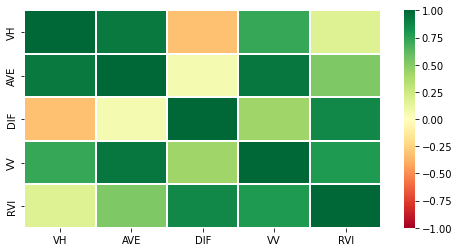

In [19]:
# Sentinel 1
plt.figure(figsize=(8, 4))
cols_to_select = s1_features_importance_df.iloc[:s1_number_features_widget.value].index
sns.heatmap(s1_df_norm[cols_to_select].corr(method=corr_method_dropdown.value.lower()), cmap='RdYlGn', linewidths = 0.1, vmin=-1, vmax=1);

## Show the trends of some of the features mostly impacted by manure application

In data analysis, it is important to show trends of features impacted by manure application to better understand the impact of this practice on crop yields and other outcomes. By examining trends in these features over time, you can gain insight into how manure application affects different crop fields and identify patterns that may be useful in predicting future outcomes.

For example, showing the trends of key features impacted by manure application, you can maybe identify which crops are most responsive to this practice and which fields may benefit most from it. Additionally, by examining trends over the course of a year, you can identify seasonal patterns that may be useful in optimizing manure application rates and timing for different crops and fields.

**Observation**: Shown features values are not the plain original ones, but the scaled ones between `[-1, 1]`.

In [20]:
s2_number_features_widget = ipywidgets.widgets.IntSlider(value=5, min=1, max=len(s2_df_norm.columns), step=1, description='S2 #feats:')
display(s2_number_features_widget)

s1_number_features_widget = ipywidgets.widgets.IntSlider(value=3, min=1, max=len(s1_df_norm.columns), step=1, description='S1 #feats: ')
display(s1_number_features_widget)

IntSlider(value=5, description='S2 #feats:', max=64, min=1)

IntSlider(value=3, description='S1 #feats: ', max=11, min=1)

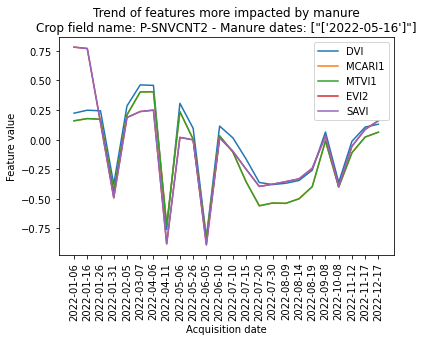

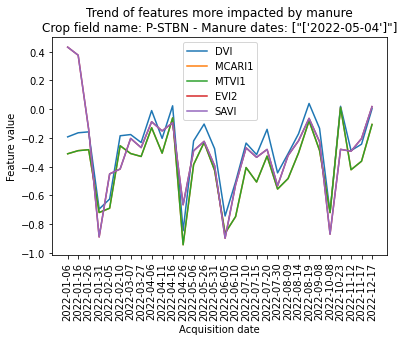

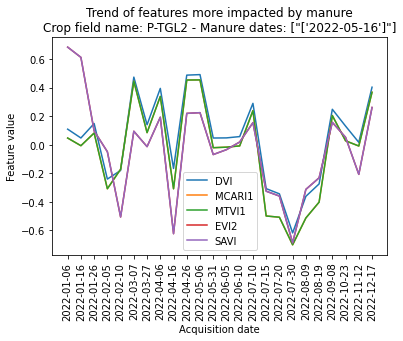

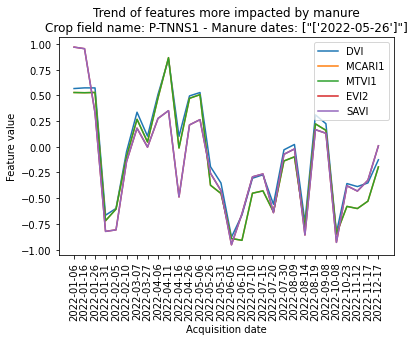

In [21]:
# Sentinel-2
utils.display_features_trends(s2_df_norm, (20, 24), s2_features_importance_df.index, (0, s2_number_features_widget.value), 2)

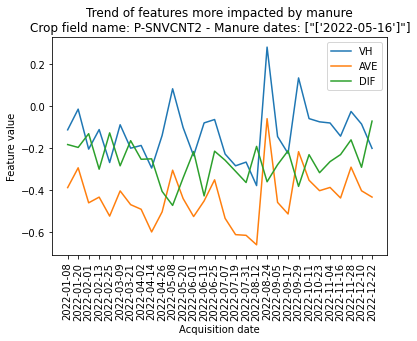

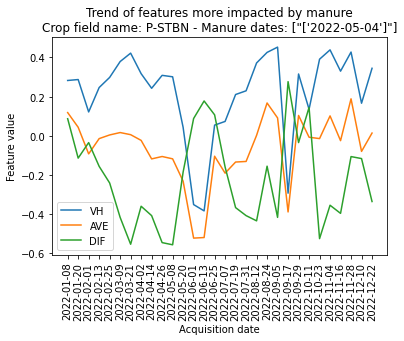

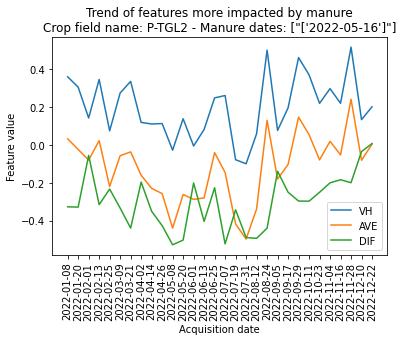

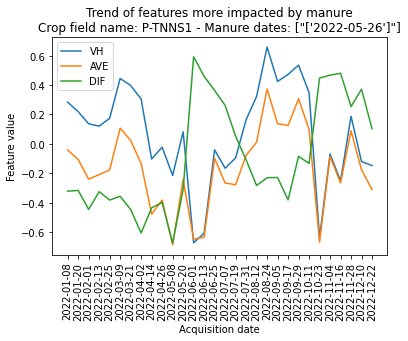

In [22]:
# Sentinel-1
utils.display_features_trends(s1_df_norm, (20, 24), s1_features_importance_df.index, (0, s1_number_features_widget.value), 1)